In [7]:
!https_proxy=http://192.41.170.23:3128 http_proxy=http://192.41.170.23:3128 pip install mne

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import mne
import pooch
from mne import create_info
from mne.io import RawArray
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import glob
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

Import data

In [2]:
# subject = list(range(1,10+1))
# runs = [3,7,11]
edf_files = glob.glob("datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/*.edf")


140
123


Extracting EDF parameters from /home/st122497/work/Project/dataset10/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


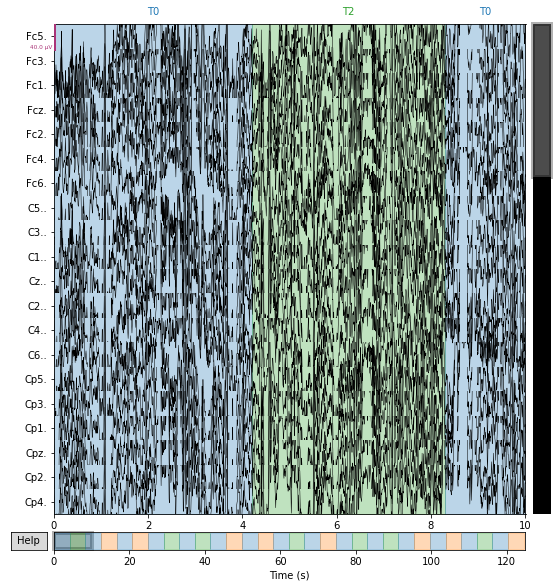

In [5]:
edf = mne.io.read_raw_edf('dataset10/1.0.0/S001/S001R03.edf',preload=True)
edf.plot();

Extracting EDF parameters from /home/st122497/work/Project/dataset10/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


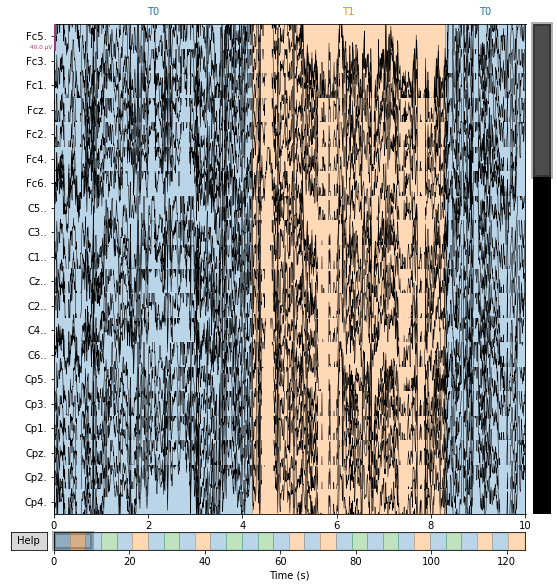

In [6]:
edf = mne.io.read_raw_edf('dataset10/1.0.0/S001/S001R07.edf',preload=True)
edf.plot();

In [8]:
raws = [read_raw_edf(f, preload=True) for f in edf_files]
raw_obj = concatenate_raws(raws)
raw_obj

Extracting EDF parameters from /home/st122497/work/Project/dataset10/1.0.0/S009/S009R07.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/st122497/work/Project/dataset10/1.0.0/S009/S009R14.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., 

<RawEDF | S009R07.edf, 64 x 2373120 (14832.0 s), ~1.13 GB, data loaded>

In [9]:
raw_data = raw_obj.get_data()
raw_data.shape

(64, 2373120)

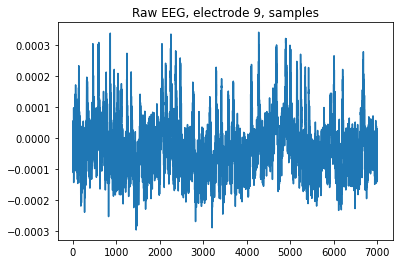

In [10]:
plt.plot(raw_data[3,0:7000])
plt.title("Raw EEG, electrode 9, samples")
plt.show()

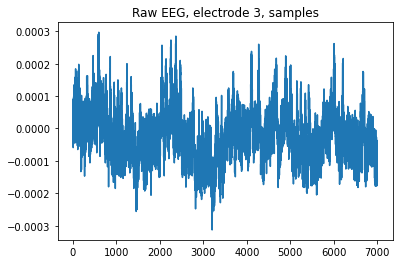

In [11]:
plt.plot(raw_data[9,0:7000])
plt.title("Raw EEG, electrode 3, samples")
plt.show()

In [12]:
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
event_ids

Used Annotations descriptions: ['T0', 'T1', 'T2']


{'T0': 1, 'T1': 2, 'T2': 3}

In [13]:
tmin, tmax = 0, 4  
epochs = mne.Epochs(raw_obj, events, event_ids, tmin, tmax, baseline=None, preload=True)

Not setting metadata
Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3600 events and 641 original time points ...
0 bad epochs dropped


In [14]:
data = epochs._data
# elc9 = data[:,9,:].reshape(3603,1,641)
# elc3 = data[:,3,:].reshape(3603,1,641)
# data  = np.concatenate((elc9,elc3), axis=1)

data.shape

(3600, 64, 641)

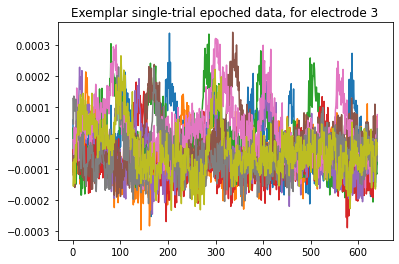

In [15]:
plt.plot(data[1:10,3,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 3")
plt.show()

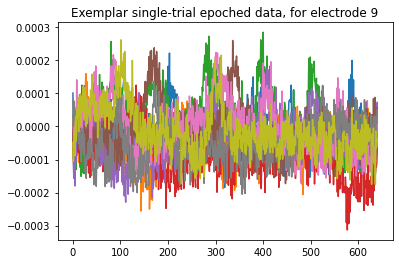

In [16]:
plt.plot(data[1:10,9,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 9")
plt.show()

In [17]:
y = epochs.events[:, -1]

In [18]:
torch_X = torch.from_numpy(data)
torch_y = torch.from_numpy(y)
torch_y = torch_y-1
# torch_X_reshaped  = torch_X
torch_X_reshaped = torch_X.permute(0, 2, 1)
print("Converted X: ", torch_X_reshaped.size())


Converted X:  torch.Size([3600, 641, 64])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(torch_X_reshaped,torch_y, test_size=0.3)
print(X_train.shape, y_train.shape)

torch.Size([2520, 641, 64]) torch.Size([2520])


In [20]:
# X_train = X_train[y_train==1]
# y_train =y_train[y_train==1]

In [21]:
batch_size = 50
def create_dataloader(X, y, batch_size):
    X_tensor = torch.tensor(X).float()
    y_tensor = torch.tensor(y).long()
    dataset_tensor = TensorDataset(X_tensor, y_tensor)
    dl = torch.utils.data.DataLoader(dataset_tensor, batch_size=batch_size, shuffle=True)
    return dl
train_loader = create_dataloader(X_train, y_train, batch_size=batch_size)
test_loader = create_dataloader(X_test, y_test, batch_size=batch_size)

/tmp/ipykernel_393/1029740696.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X).float()
/tmp/ipykernel_393/1029740696.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y).long()


In [22]:
for i, (images, label) in enumerate(train_loader):
    print(images.shape)
    break

torch.Size([50, 641, 64])


In [23]:
# name = [item['name'] for item in your_list]

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [27]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.lstm = nn.LSTM(input_dim,
                            hidden_dim, 
                           num_layers=num_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        
    
    def attention_net(self, lstm_output, final_state):
        hidden = final_state.unsqueeze(2)  # hidden : [batch_size, n_hidden * num_directions(=2), 1(=n_layer)]
        attn_weights = torch.bmm(lstm_output, hidden).squeeze(2) # attn_weights : [batch_size, seq_len, 1]
        soft_attn_weights = F.softmax(attn_weights, 1)
        # [batch_size, n_hidden * num_directions(=2), seq_len] * [batch_size, seq_len, 1] = [batch_size, n_hidden * num_directions(=2), 1]
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)
        return context, soft_attn_weights.cpu().data.numpy() # context : [batch_size, n_hidden * num_directions(=2)]

    def forward(self, text):
        #embedded = [batch size, seq len, embed dim]
        output, (hn, cn) = self.lstm(text)  #if no h0, all zeroes
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        hn = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim = 1)
        #hn = [batch size, hidden dim * num directions]
        
        attn_output, attention = self.attention_net(output, hn)
        print(attn_output.shape)
        return self.fc(attn_output), attention # model : [batch_size, num_classes], attention : [batch_size, n_step]

In [29]:
input_dim = 64
hidden_dim = 32
num_layers = 2
num_classes = 3
output_dim = 3
bidirectional = True
dropout = 0.5
# embed_dim = 64
model_lstm = LSTM()
# model_lstm = LSTM(input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout)
model_lstm = model_lstm.float() #define precision as float to reduce running time
model = model_lstm

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model {type(model_lstm).__name__} has {count_parameters(model_lstm):,} trainable parameters')# Train the model

The model LSTM has 50,371 trainable parameters


In [36]:
import torch.optim as optim

learning_rate = 0.0001

# optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9) 
# criterion = nn.NLLLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Configured device: ", device)
device = 'cpu'

Configured device:  cuda


In [38]:
criterion = criterion

In [39]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [40]:
# attention
import sys
num_epochs = 500
tol=1e-5
train_acc = []
train_losses = []
loss_old=10000
total_step = len(train_loader)
for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        
        #con2d expects (batch, channel, width, height)
        images = images.to(device)
        labels = labels.to(device)
        # images = images
        # labels = labels
        
        # Forward pass
        outputs, attention = model(images)
        
        loss = criterion(outputs, labels)
        print(outputs.shape)
        predicted = torch.argmax(outputs.data, dim = 1)
        # _, predicted = torch.max(outputs, 1)
        # print(_)
        print(predicted)
        total_loss += loss.item()
        
        if torch.abs(loss - loss_old) < tol:  
            iter_stop = i
            break
        loss_old = loss        
        correct += (predicted == labels).sum().item()       
        # Backward and optimize
        optimizer.zero_grad()
        loss_old.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            sys.stdout.write ('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    train_acc.append(100 * correct / len(train_loader.dataset))
    train_losses.append(total_loss / len(train_loader))

torch.Size([50, 64])
torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/500], Step [1/51], Loss: 1.0684torch.Size([50, 64])
torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/500], Step [2/51], Loss: 1.0811torch.Size([50, 64])
torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/500], Step [3/51], Loss: 1.0711torch.Size([50, 64])
torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/500], S

KeyboardInterrupt: 

In [ ]:
plt.plot(train_acc, label='train')
plt.title('Train Accuracy')
plt.show()
plt.plot(train_losses, label='train')
plt.title('Train Losses')
plt.show()

In [108]:
# N_EPOCHS = 20

# best_valid_loss = float('inf')


# import time
    
# start_time = time.time()

# for epoch in range(N_EPOCHS):
#     start_time = time.time()

#     train_loss, train_acc = train(model, train_loader, optimizer, criterion)
#     # valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

#     # end_time = time.time()

#     # epoch_mins, epoch_secs = epoch_time(start_time, end_time)

In [106]:
train_acc[-1]

0.0

In [107]:
# Test the model
model.eval()  # eval mode will turn off the dropout; good to explicitly call when you test
all_labels = []
all_predicted = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs, attention = model(images)
        # print(outputs)
        predicted = torch.argmax(outputs.data, dim = 1)
        print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.append(labels.cpu().numpy())  #for plotting
        all_predicted.append(predicted.cpu().numpy())

    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [120]:
import sys
num_epochs = 50
tol=1e-5
train_acc = []
train_losses = []
loss_old=10000
total_step = len(train_loader)
for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        
        #con2d expects (batch, channel, width, height)
        images = images.to(device)
        labels = labels.to(device)
        # images = images
        # labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        print(outputs.shape)
        _, predicted = torch.max(outputs.data, 1)
        # print(_)
        print(predicted)
        total_loss += loss.item()
        
        if torch.abs(loss - loss_old) < tol:  
            iter_stop = i
            break
        loss_old = loss        
        correct += (predicted == labels).sum().item()       
        # Backward and optimize
        optimizer.zero_grad()
        loss_old.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            sys.stdout.write ('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    train_acc.append(100 * correct / len(train_loader.dataset))
    train_losses.append(total_loss / len(train_loader))

torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/50], Step [1/13], Loss: 0.1251torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Epoch [1/50], Step [2/13], Loss: 0.1220torch.Size([50, 3])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


KeyboardInterrupt: 

In [121]:
len(train_loader)

13